In [64]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [54]:
data = pd.read_csv('data.csv')
data.head()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
0          1                                           0.370594          
1          1                                           0.464291          
2          1                                           0.426071          
3          1                                           0.399844          
4          1                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

   ...   Net Income to Total Assets   Total assets to GNP price  \
0  ...                     0.716845                    0.009219   
1  ...                     0.795297                    0.008323   
2  ...                     0.774670                    0.040003   
3  ...                     0.739555                    0.003252   
4  ...                     0.795016                    0.003878   

    No-credit Interval   Gross Profit to Sales  \
0             0.622879                0.601453   
1             0.623652                0.610237   
2             0.623841                0.601449   
3             0.622929                0.583538   
4             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2                                           0.563706                   1   
3                                           0.564663                   1   
4                        

In [55]:
data.shape

(6819, 96)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [57]:
data.describe()

Bankrupt?   ROA(C) before interest and depreciation before interest  \
count  6819.000000                                        6819.000000          
mean      0.032263                                           0.505180          
std       0.176710                                           0.060686          
min       0.000000                                           0.000000          
25%       0.000000                                           0.476527          
50%       0.000000                                           0.502706          
75%       0.000000                                           0.535563          
max       1.000000                                           1.000000          

        ROA(A) before interest and % after tax  \
count                              6819.000000   
mean                                  0.558625   
std                                   0.065620   
min                                   0.000000   
25%                                   0.535543   
50%                                   0.559802   
75%                                   0.589157   
max                                   1.000000   

        ROA(B) before interest and depreciation after tax  \
count                                        6819.000000    
mean                                            0.553589    
std                                             0.061595    
min                                             0.000000    
25%                                             0.527277    
50%                                             0.552278    
75%                                             0.584105    
max                                             1.000000    

        Operating Gross Margin   Realized Sales Gross Margin  \
count              6819.000000                   6819.000000   
mean                  0.607948                      0.607929   
std                   0.016934                      0.016916   
min                   0.000000                      0.000000   
25%                   0.600445                      0.600434   
50%                   0.605997                      0.605976   
75%                   0.613914                      0.613842   
max                   1.000000                      1.000000   

        Operating Profit Rate   Pre-tax net Interest Rate  \
count             6819.000000                 6819.000000   
mean                 0.998755                    0.797190   
std                  0.013010                    0.012869   
min                  0.000000                    0.000000   
25%                  0.998969                    0.797386   
50%                  0.999022                    0.797464   
75%                  0.999095                    0.797579   
max                  1.000000                    1.000000   

        After-tax net Interest Rate  \
count                   6819.000000   
mean                       0.809084   
std                        0.013601   
min                        0.000000   
25%                        0.809312   
50%                        0.809375   
75%                        0.809469   
max                        1.000000   

        Non-industry income and expenditure/revenue  ...  \
count                                   6819.000000  ...   
mean                                       0.303623  ...   
std                                        0.011163  ...   
min                                        0.000000  ...   
25%                                        0.303466  ...   
50%                                        0.303525  ...   
75%                                        0.303585  ...   
max                                        1.000000  ...   

        Net Income to Total Assets   Total assets to GNP price  \
count                  6819.000000                6.819000e+03   
mean                      0.807760                1.862942e+07   
std                       0.040332                3.764501e+08   
min

In [58]:
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6814    False
6815    False
6816    False
6817    False
6818    False
Length: 6819, dtype: bool

In [59]:
bankrupt = data['Bankrupt?']
bankrupt.value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In [60]:
data = data.drop(['Bankrupt?'],axis=1)

In [61]:
data.head()

ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                           0.516730    
2                                           0.472295    
3                                           0.457733    
4                                           0.522298    

    Operating Gross Margin   Realized Sales Gross Margin  \
0                 0.601457                      0.601457   
1                 0.610235                      0.610235   
2                 0.601450                      0.601364   
3                 0.583541                      0.583541   
4                 0.598783                      0.598783   

    Operating Profit Rate   Pre-tax net Interest Rate  \
0                0.998969                    0.796887   
1                0.998946                    0.797380   
2                0.998857                    0.796403   
3                0.998700                    0.796967   
4                0.998973                    0.797366   

    After-tax net Interest Rate   Non-industry income and expenditure/revenue  \
0                      0.808809                                      0.302646   
1                      0.809301                                      0.303556   
2                      0.808388                                      0.302035   
3                      0.808966                                      0.303350   
4                      0.809304                                      0.303475   

    Continuous interest rate (after tax)  ...   Net Income to Total Assets  \
0                               0.780985  ...                     0.716845   
1                               0.781506  ...                     0.795297   
2                               0.780284  ...                     0.774670   
3                               0.781241  ...                     0.739555   
4                               0.781550  ...                     0.795016   

    Total assets to GNP price   No-credit Interval   Gross Profit to Sales  \
0                    0.009219             0.622879                0.601453   
1                    0.008323             0.623652                0.610237   
2                    0.040003             0.623841                0.601449   
3                    0.003252             0.622929                0.583538   
4                    0.003878             0.623521                0.598782   

    Net Income to Stockholder's Equity   Liability to Equity  \
0                             0.827890              0.290202   
1                             0.839969              0.283846   
2                             0.836774              0.290189   
3                             0.834697              0.281721   
4                             0.839973              0.278514   

    Degree of Financial Leverage (DFL)  \
0                             0.026601   
1                             0.264577   
2                             0.026555   
3                             0.026697   
4                             0.024752   

    Interest Coverage Ratio (Interest expense to EBIT)   Net Income Flag  \
0                                           0.564050                   1   
1                                           0.570175                   1   
2         

In [8]:
data.isnull().sum()

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

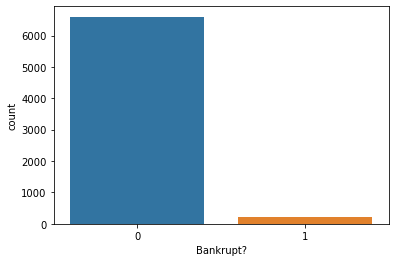

In [9]:
sns.countplot(x='Bankrupt?',data=data)

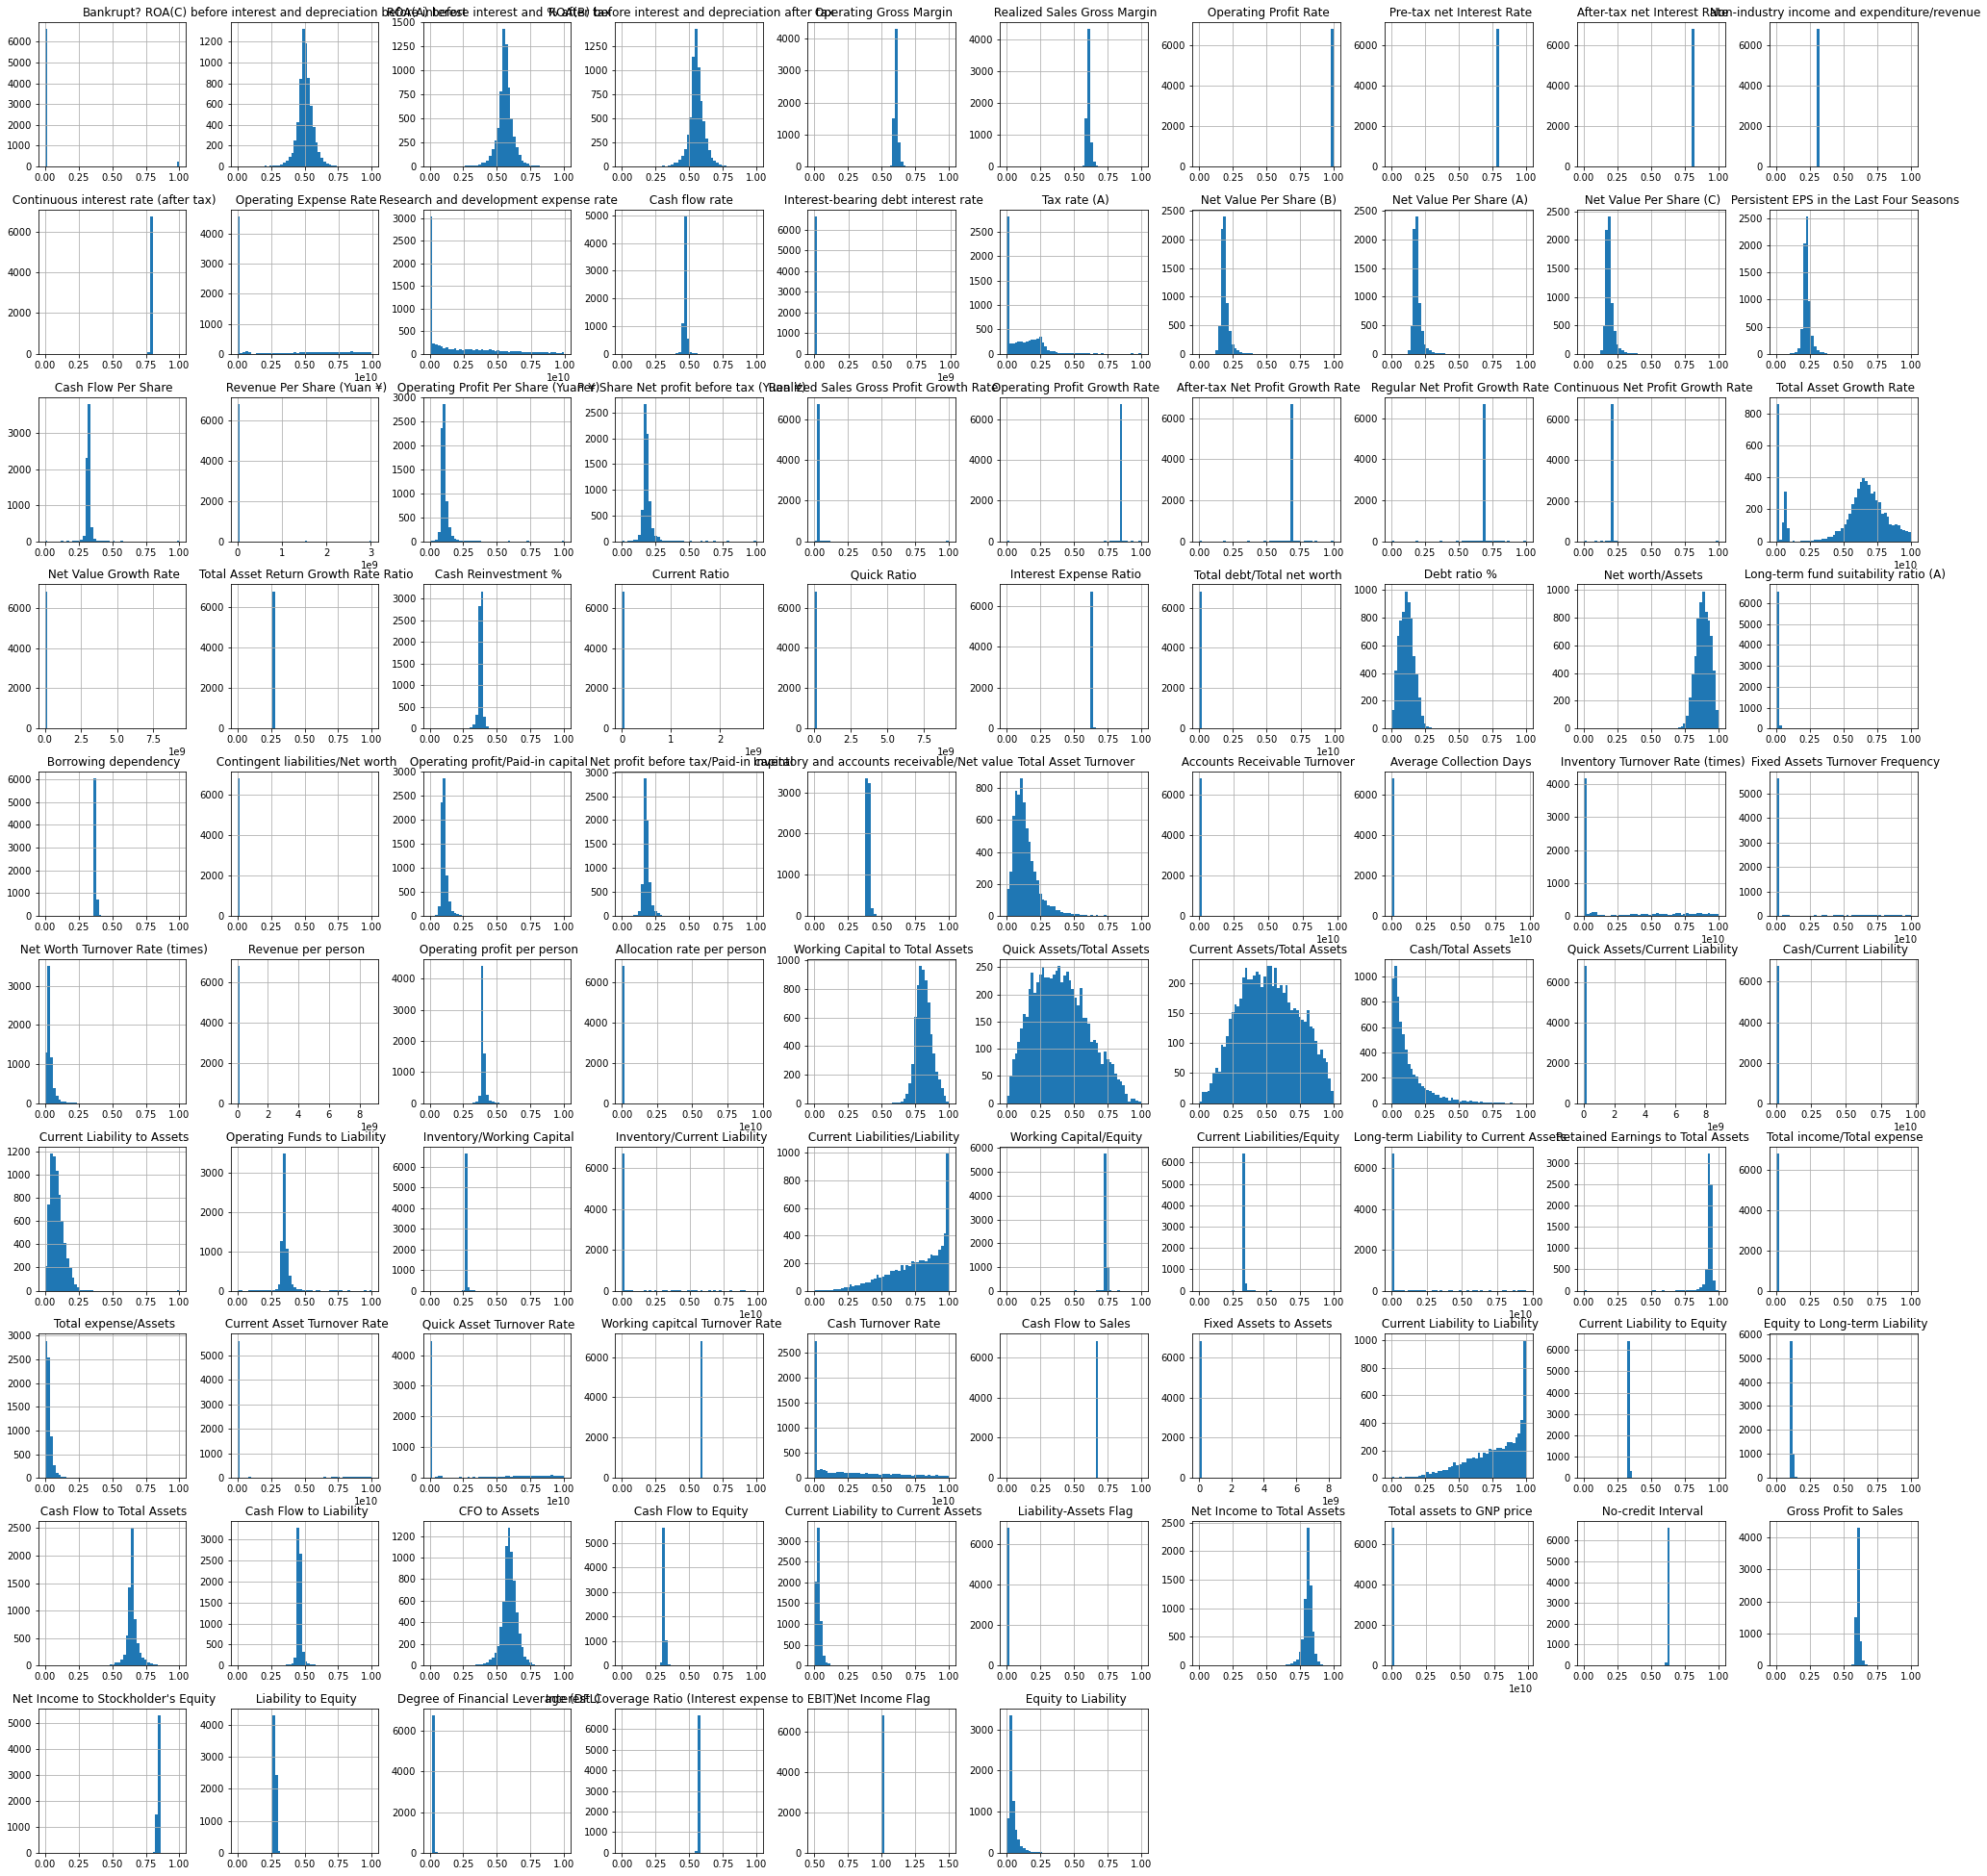

In [10]:
data.hist(figsize=(35,35), bins=50)
plt.show()

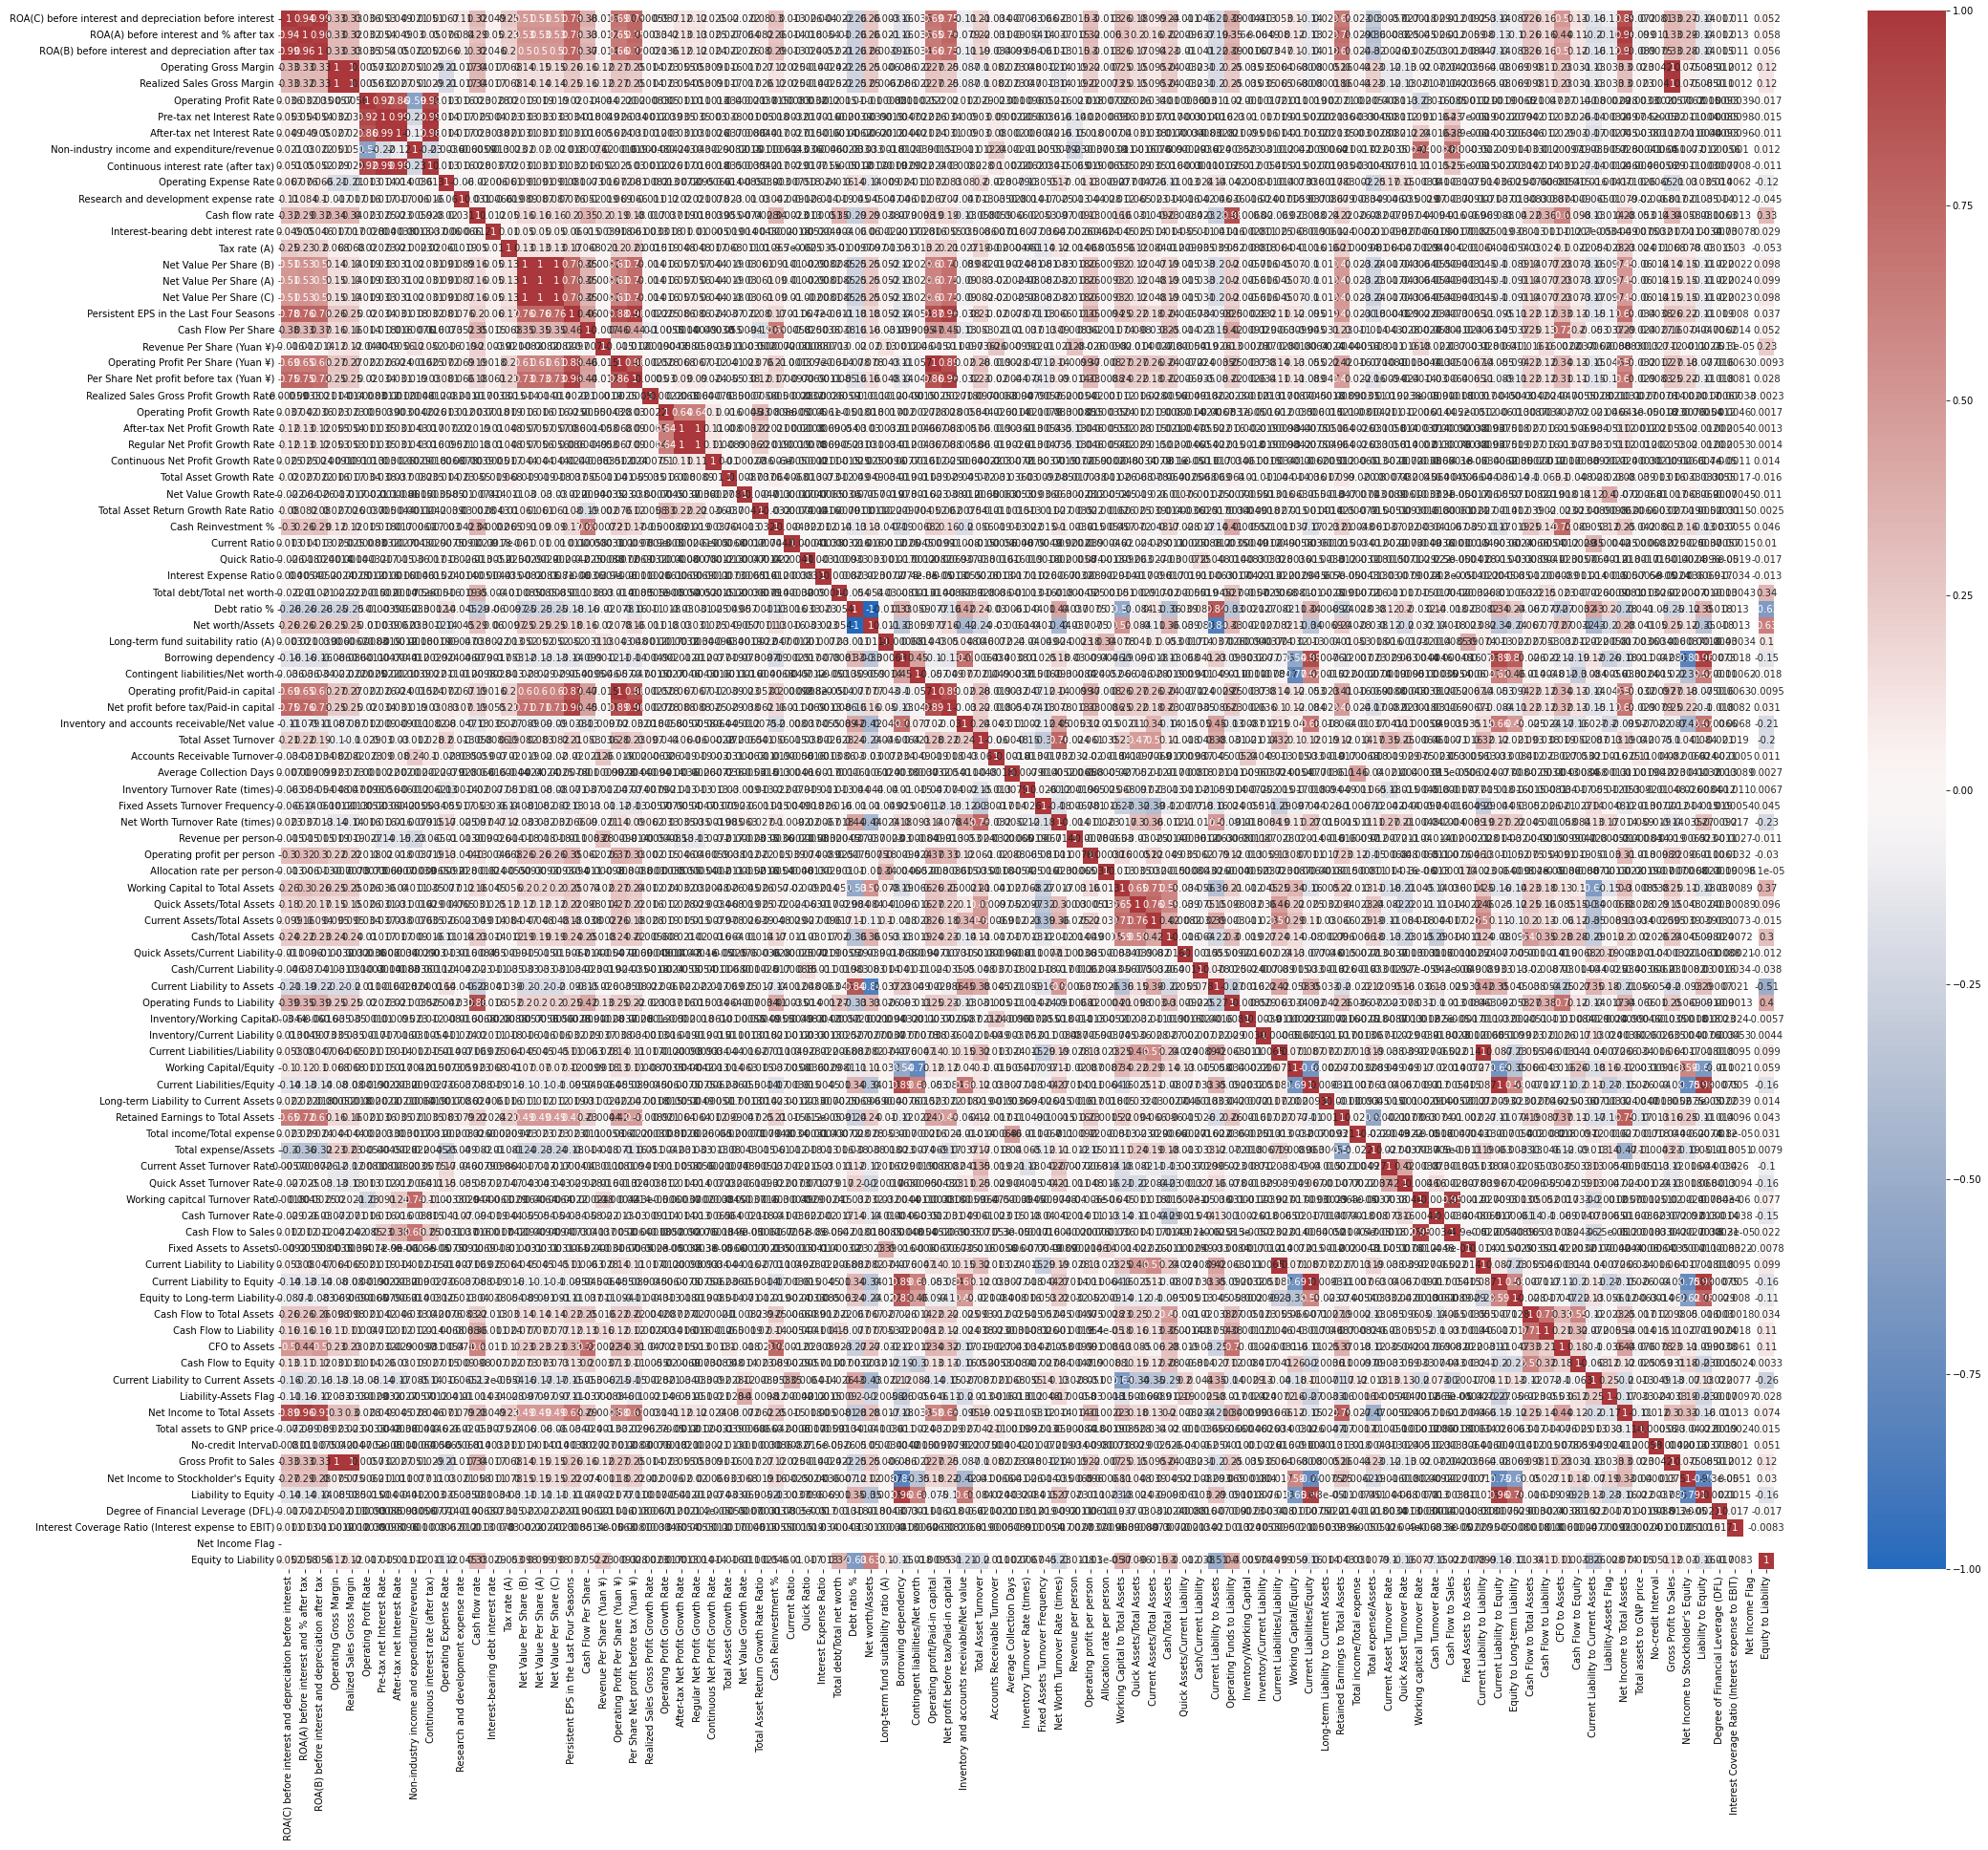

In [82]:
matrix = data.corr()
fig, ax = plt.subplots(figsize=(35,30))
sns.heatmap(matrix, annot=True, vmax=1, center=0, cmap='vlag')
plt.show()

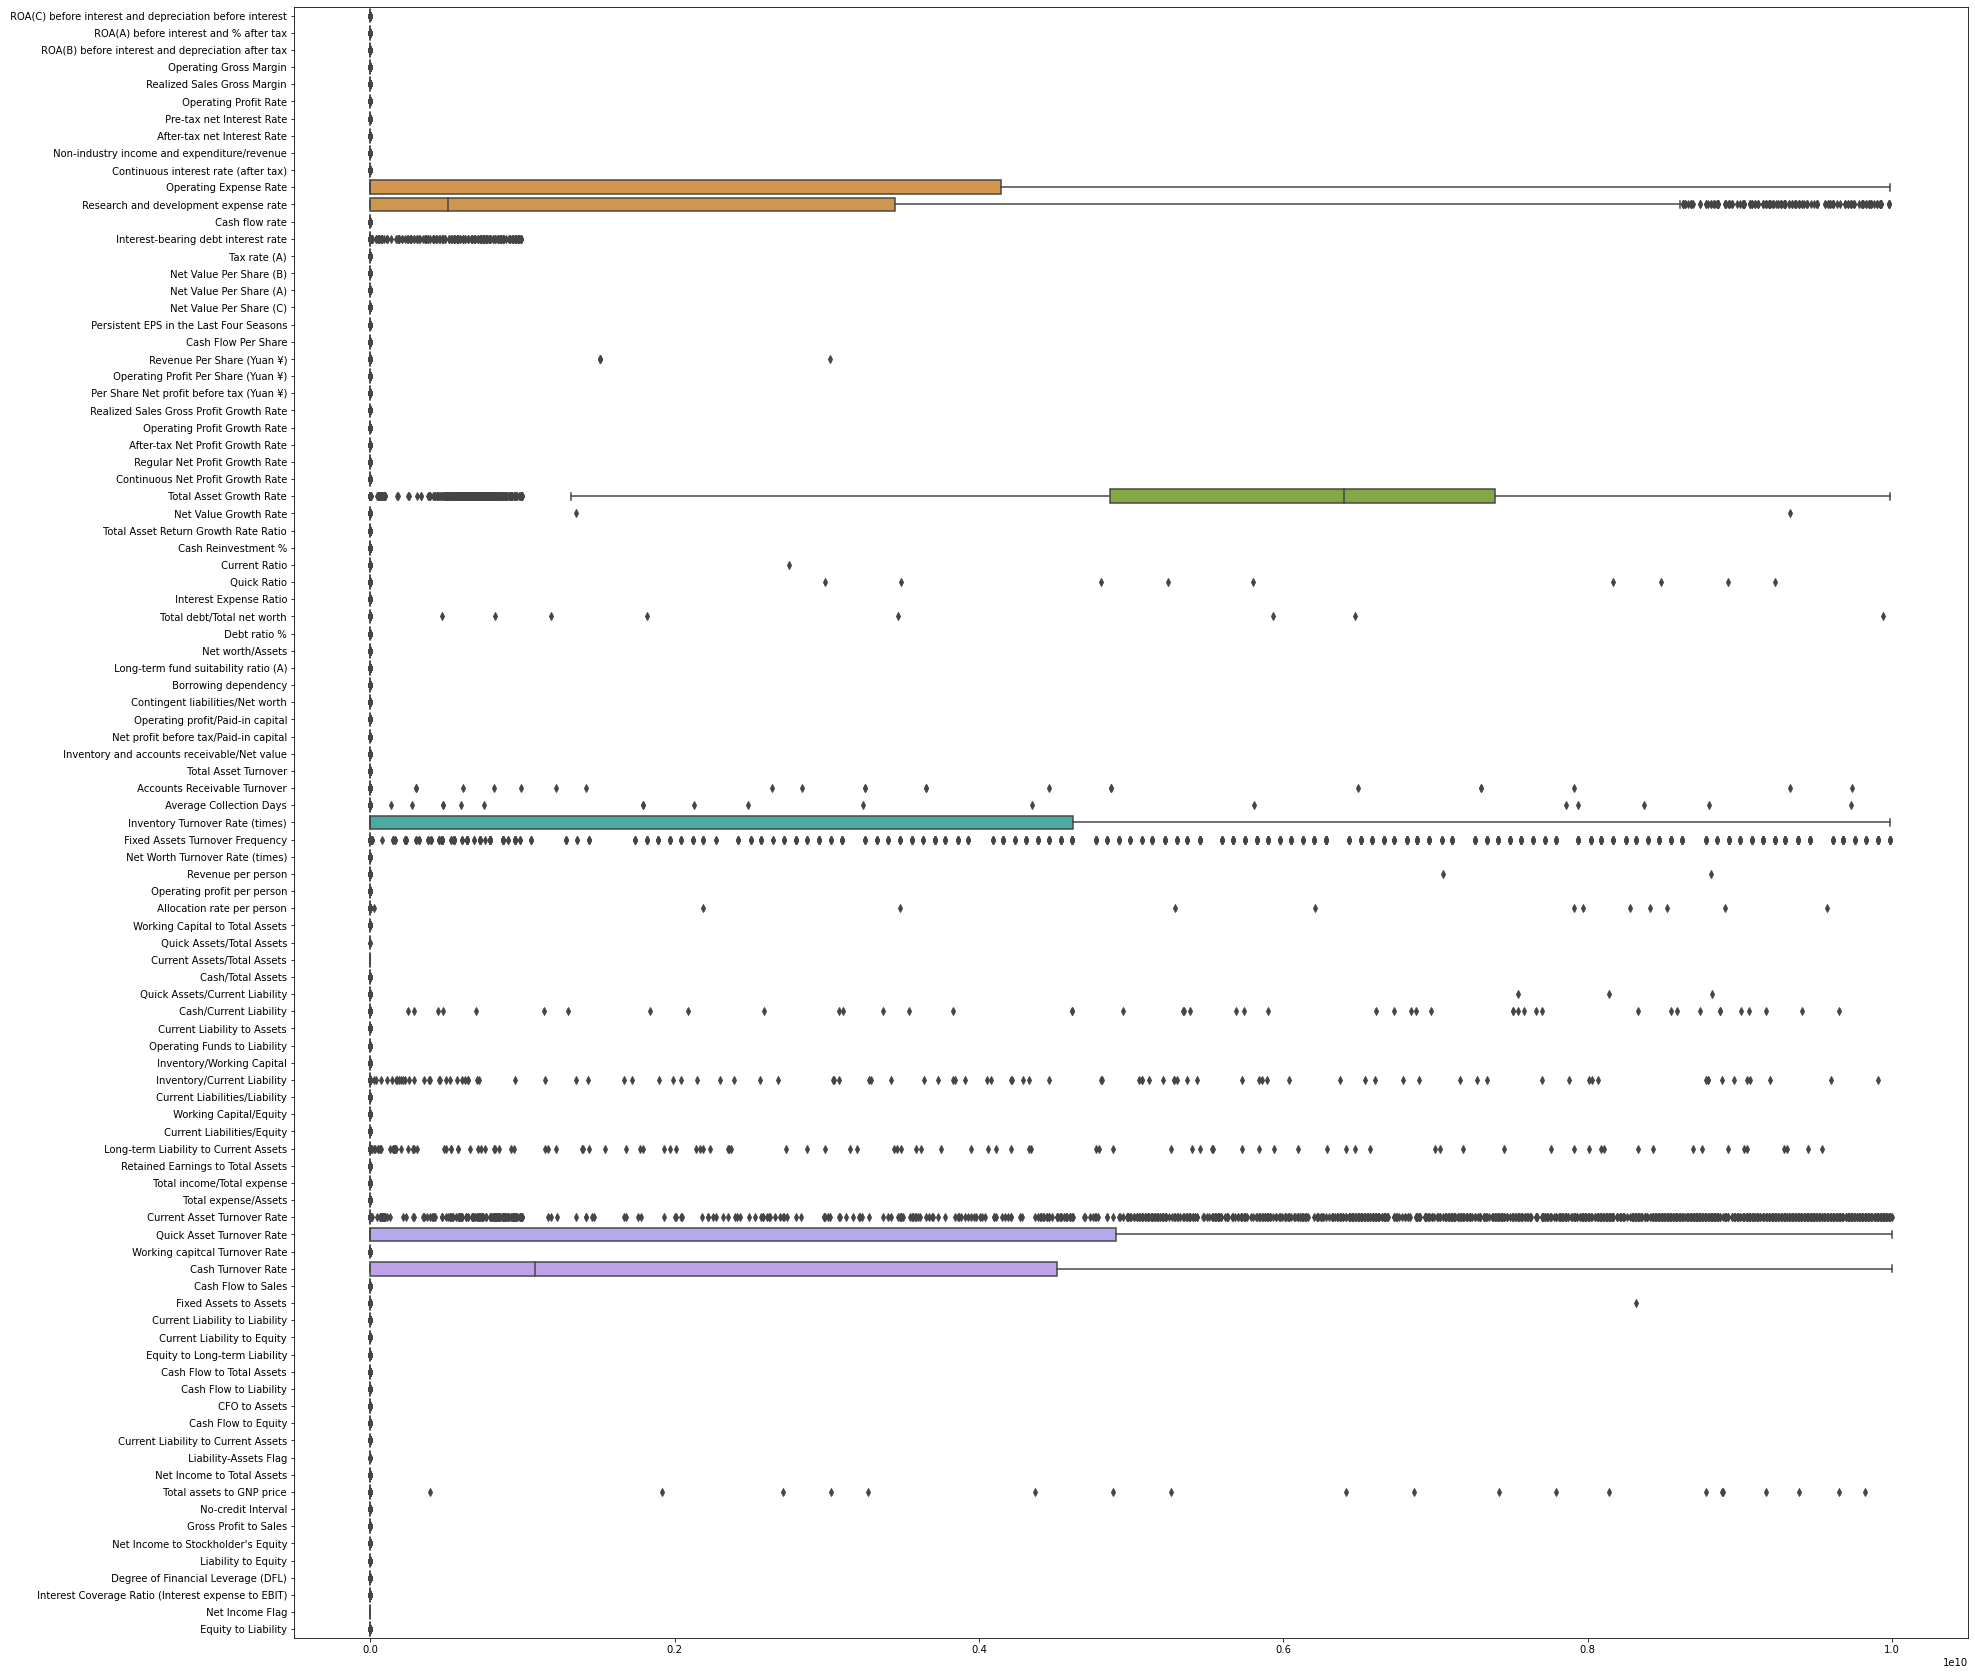

In [85]:
plt.figure(figsize = (30,30))
sns.boxplot(data=data, orient='h')
plt.show()

Logistic Regression

In [12]:
logistic = LogisticRegression()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(data.drop('Bankrupt?',axis=1), 
                                                    data['Bankrupt?'],test_size=0.2, random_state=5)

In [14]:
logistic.fit(x_train, y_train)

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [15]:
logistic.score(x_train, y_train)

0.9638863428047663

In [16]:
confusion_matrix(y_test, logistic.predict(x_test))

array([[1311,    7],
       [  46,    0]], dtype=int64)

In [17]:
print(classification_report(y_test, logistic.predict(x_test)))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.00      0.00      0.00        46

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.95      1364



In [19]:
#KNN

In [35]:
#knn = ['Bankrupt?', ' Net profit before tax/Paid-in capital', ' Persistent EPS in the Last Four Seasons', " Interest-bearing debt interest rate", " Total debt/Total net worth", " Fixed Assets Turnover Frequency", " Cash/Total Assets", " Equity to Liability"]
knn = data
X = knn.iloc[:,1:].values
y = knn.iloc[:,0].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [36]:
classifier = KNeighborsClassifier(p=1)

In [37]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(p=1)

In [39]:
print(accuracy_score(y_test, classifier.predict(X_test)))

0.9648093841642229


In [40]:
print(confusion_matrix(y_test, classifier.predict(X_test)))

[[1645    1]
 [  59    0]]


In [78]:
print(classification_report(y_test, classifier.predict(X_test)))

C:\Users\Justin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      3308
           1       0.60      0.03      0.06       102

    accuracy                           0.97      3410
   macro avg       0.79      0.51      0.52      3410
weighted avg       0.96      0.97      0.96      3410



In [41]:
#Decision Tree

In [45]:
decisiontree = DecisionTreeClassifier(criterion='gini',max_depth=None, min_samples_leaf=1, random_state=10)
decisiontree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [49]:
accuracy_score(y_test,decisiontree.predict(X_test))

0.9542521994134897

In [50]:
confusion_matrix(y_test,decisiontree.predict(X_test))

array([[1605,   41],
       [  37,   22]], dtype=int64)

In [73]:
print(classification_report(y_test,decisiontree.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3308
           1       0.82      0.80      0.81       102

    accuracy                           0.99      3410
   macro avg       0.91      0.90      0.90      3410
weighted avg       0.99      0.99      0.99      3410



C:\Users\Justin\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [51]:
#Random Forest

In [66]:
randomforest = RandomForestClassifier(criterion = 'gini')
X_train, X_test, y_train, y_test = train_test_split(data, bankrupt, test_size=0.5, random_state=0)
randomforest.fit(X_train,y_train)

RandomForestClassifier()

In [68]:
accuracy_score(y_test,randomforest.predict(X_test))

0.9724340175953079

In [69]:
confusion_matrix(y_test,randomforest.predict(X_test))

array([[3301,    7],
       [  87,   15]], dtype=int64)

In [71]:
print(classification_report(y_test,randomforest.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99      3308
           1       0.68      0.15      0.24       102

    accuracy                           0.97      3410
   macro avg       0.83      0.57      0.61      3410
weighted avg       0.97      0.97      0.96      3410

